In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [111]:
def load_data():
    df = pd.read_csv("smartphone_activity_dataset.csv")
    return df

In [112]:
def load_description():
    attributes = pd.read_csv("attributes_smartphone_activity.csv")
    return attributes

In [113]:
df = load_data()

In [114]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Data columns (total 562 columns):
 #   Column       Dtype  
---  ------       -----  
 0   feature_1    float64
 1   feature_2    float64
 2   feature_3    float64
 3   feature_4    float64
 4   feature_5    float64
 5   feature_6    float64
 6   feature_7    float64
 7   feature_8    float64
 8   feature_9    float64
 9   feature_10   float64
 10  feature_11   float64
 11  feature_12   float64
 12  feature_13   float64
 13  feature_14   float64
 14  feature_15   float64
 15  feature_16   float64
 16  feature_17   float64
 17  feature_18   float64
 18  feature_19   float64
 19  feature_20   float64
 20  feature_21   float64
 21  feature_22   float64
 22  feature_23   float64
 23  feature_24   float64
 24  feature_25   float64
 25  feature_26   float64
 26  feature_27   float64
 27  feature_28   float64
 28  feature_29   float64
 29  feature_30   float64
 30  feature_31   float64
 31  feature_32   float64
 32  f

In [115]:
y = df["activity"]
X = df.drop(['activity'],axis=1)

In [116]:
def remove_correlated(df):
    corr = df.corr()

    # Create a mask for values above 90% 
    # But also below 100% since it variables correlated with the same one
    mask = (df.corr() > 0.9) & (df.corr() < 1.0)
    high_corr = corr[mask]

    # Create a new column mask using any() and ~
    col_to_filter_out = ~high_corr[mask].any()

    # Apply new mask
    df_clean = df[high_corr.columns[col_to_filter_out]]

    # Visualize cleaned dataset
    return df_clean

In [117]:
def check_what_influence(X,y,n):
    X_copy = X.copy()
    X_copy["activity"] = y
    corr_matrix = X_copy.corr().abs()
    corr_matrix = corr_matrix["activity"]
    return corr_matrix.nlargest(n).iloc[1:]

In [118]:
def choose_the_best(df,features):
    df = df[features]
    return df

In [119]:
def preprocess_data(X,y):
    X = remove_correlated(X)
    features = check_what_influence(X,y,50)
    features_list = [str(col) for col in features.index]
    X = choose_the_best(X,features_list)
    return X,y

In [120]:
X,y = preprocess_data(X,y)

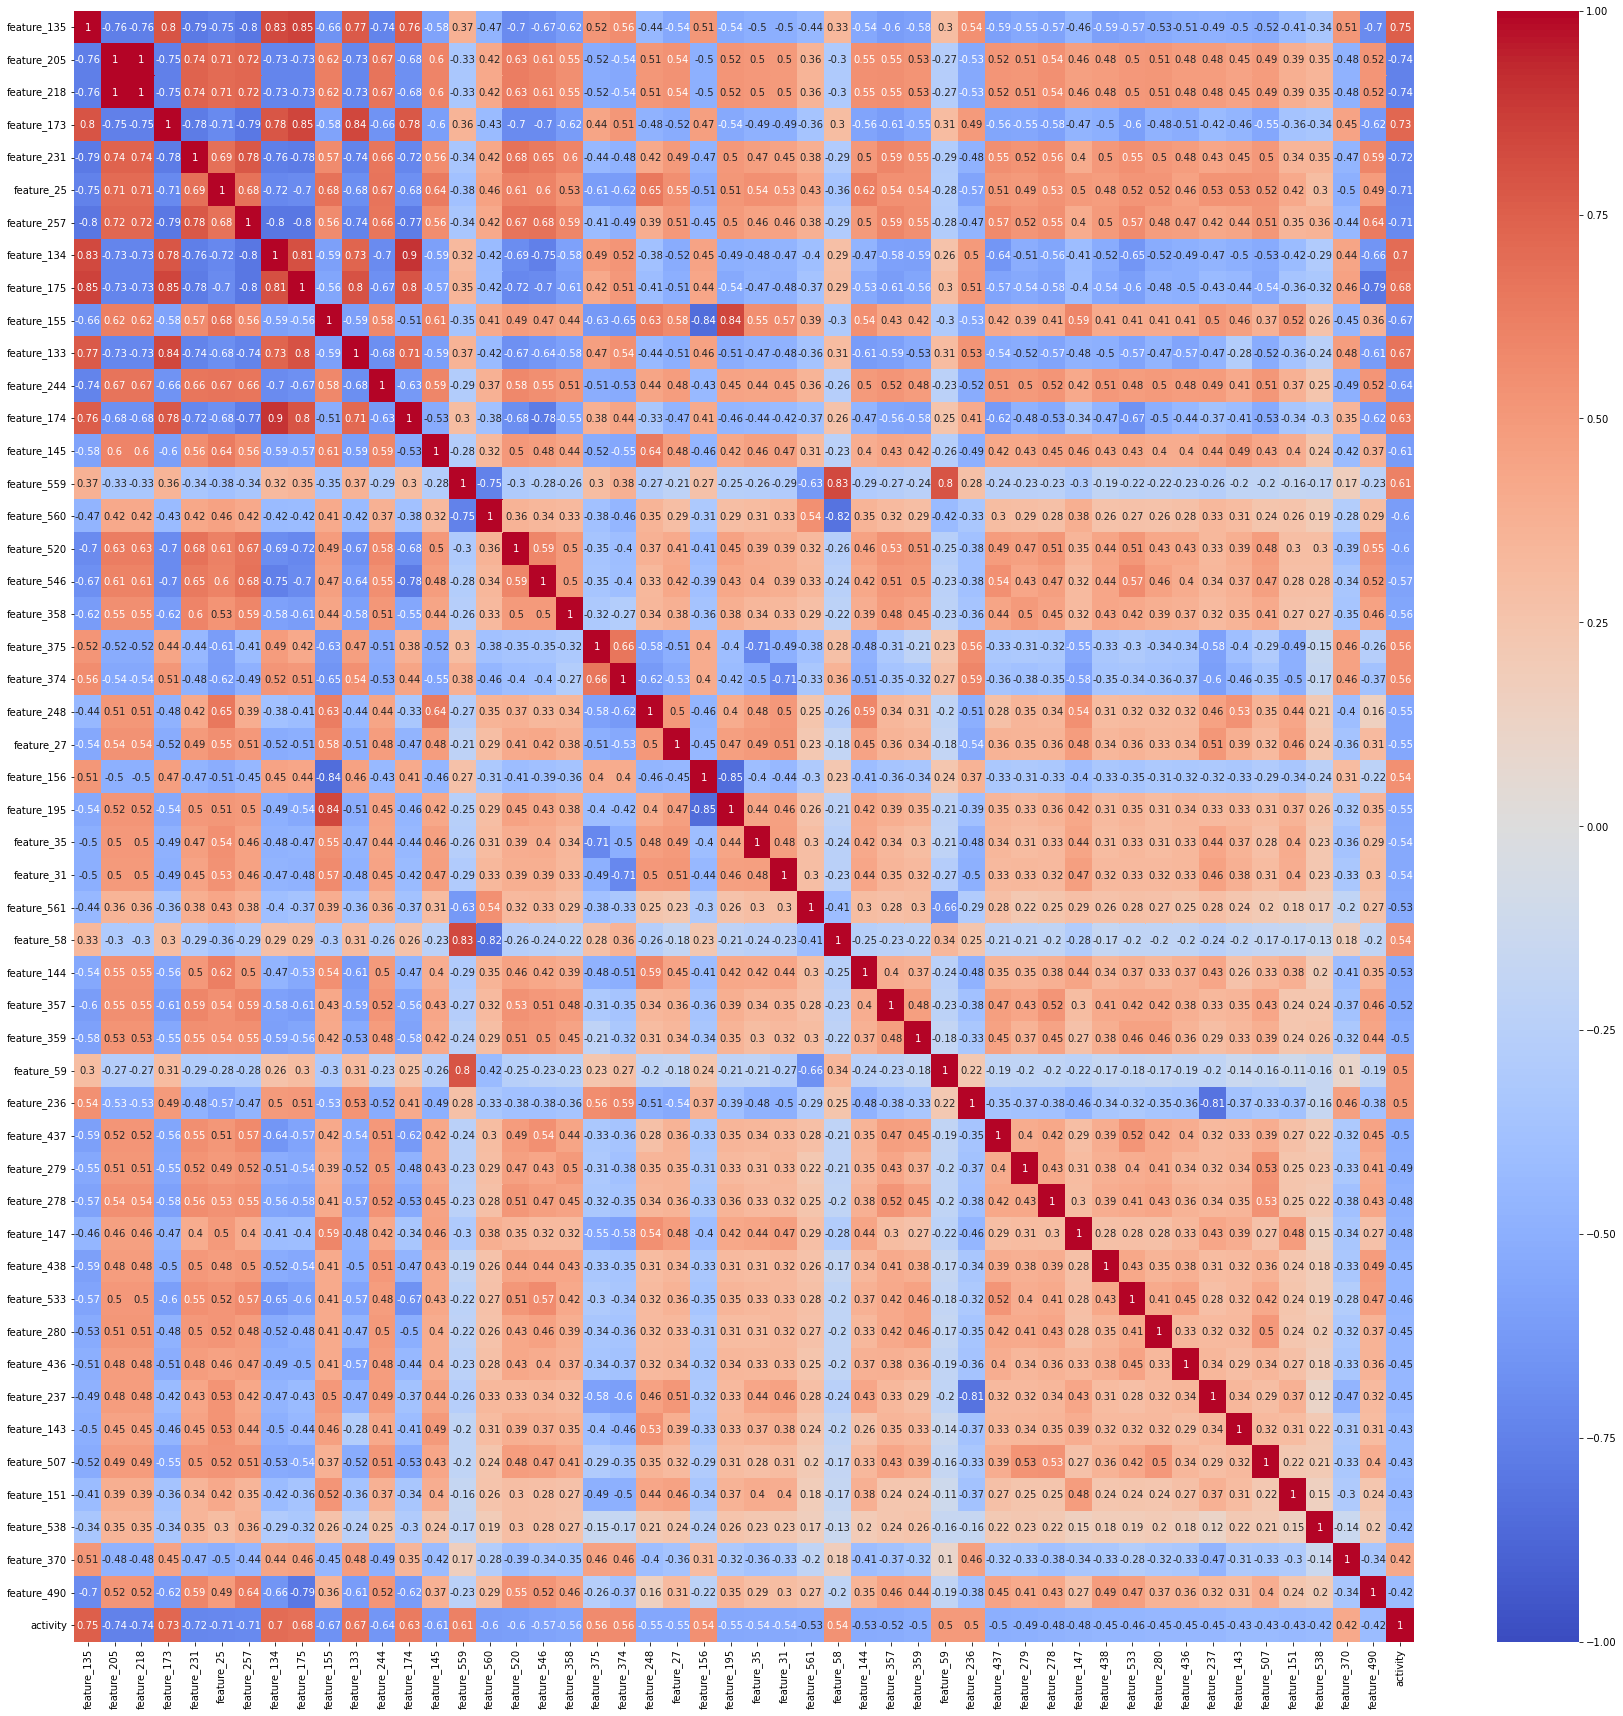

In [121]:
#corr map on shorter dataset
df = X_train.copy()
df["activity"] = y_train
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap='coolwarm', annot = True)

In [122]:
X = X.drop(['feature_218', "feature_174"], axis=1)

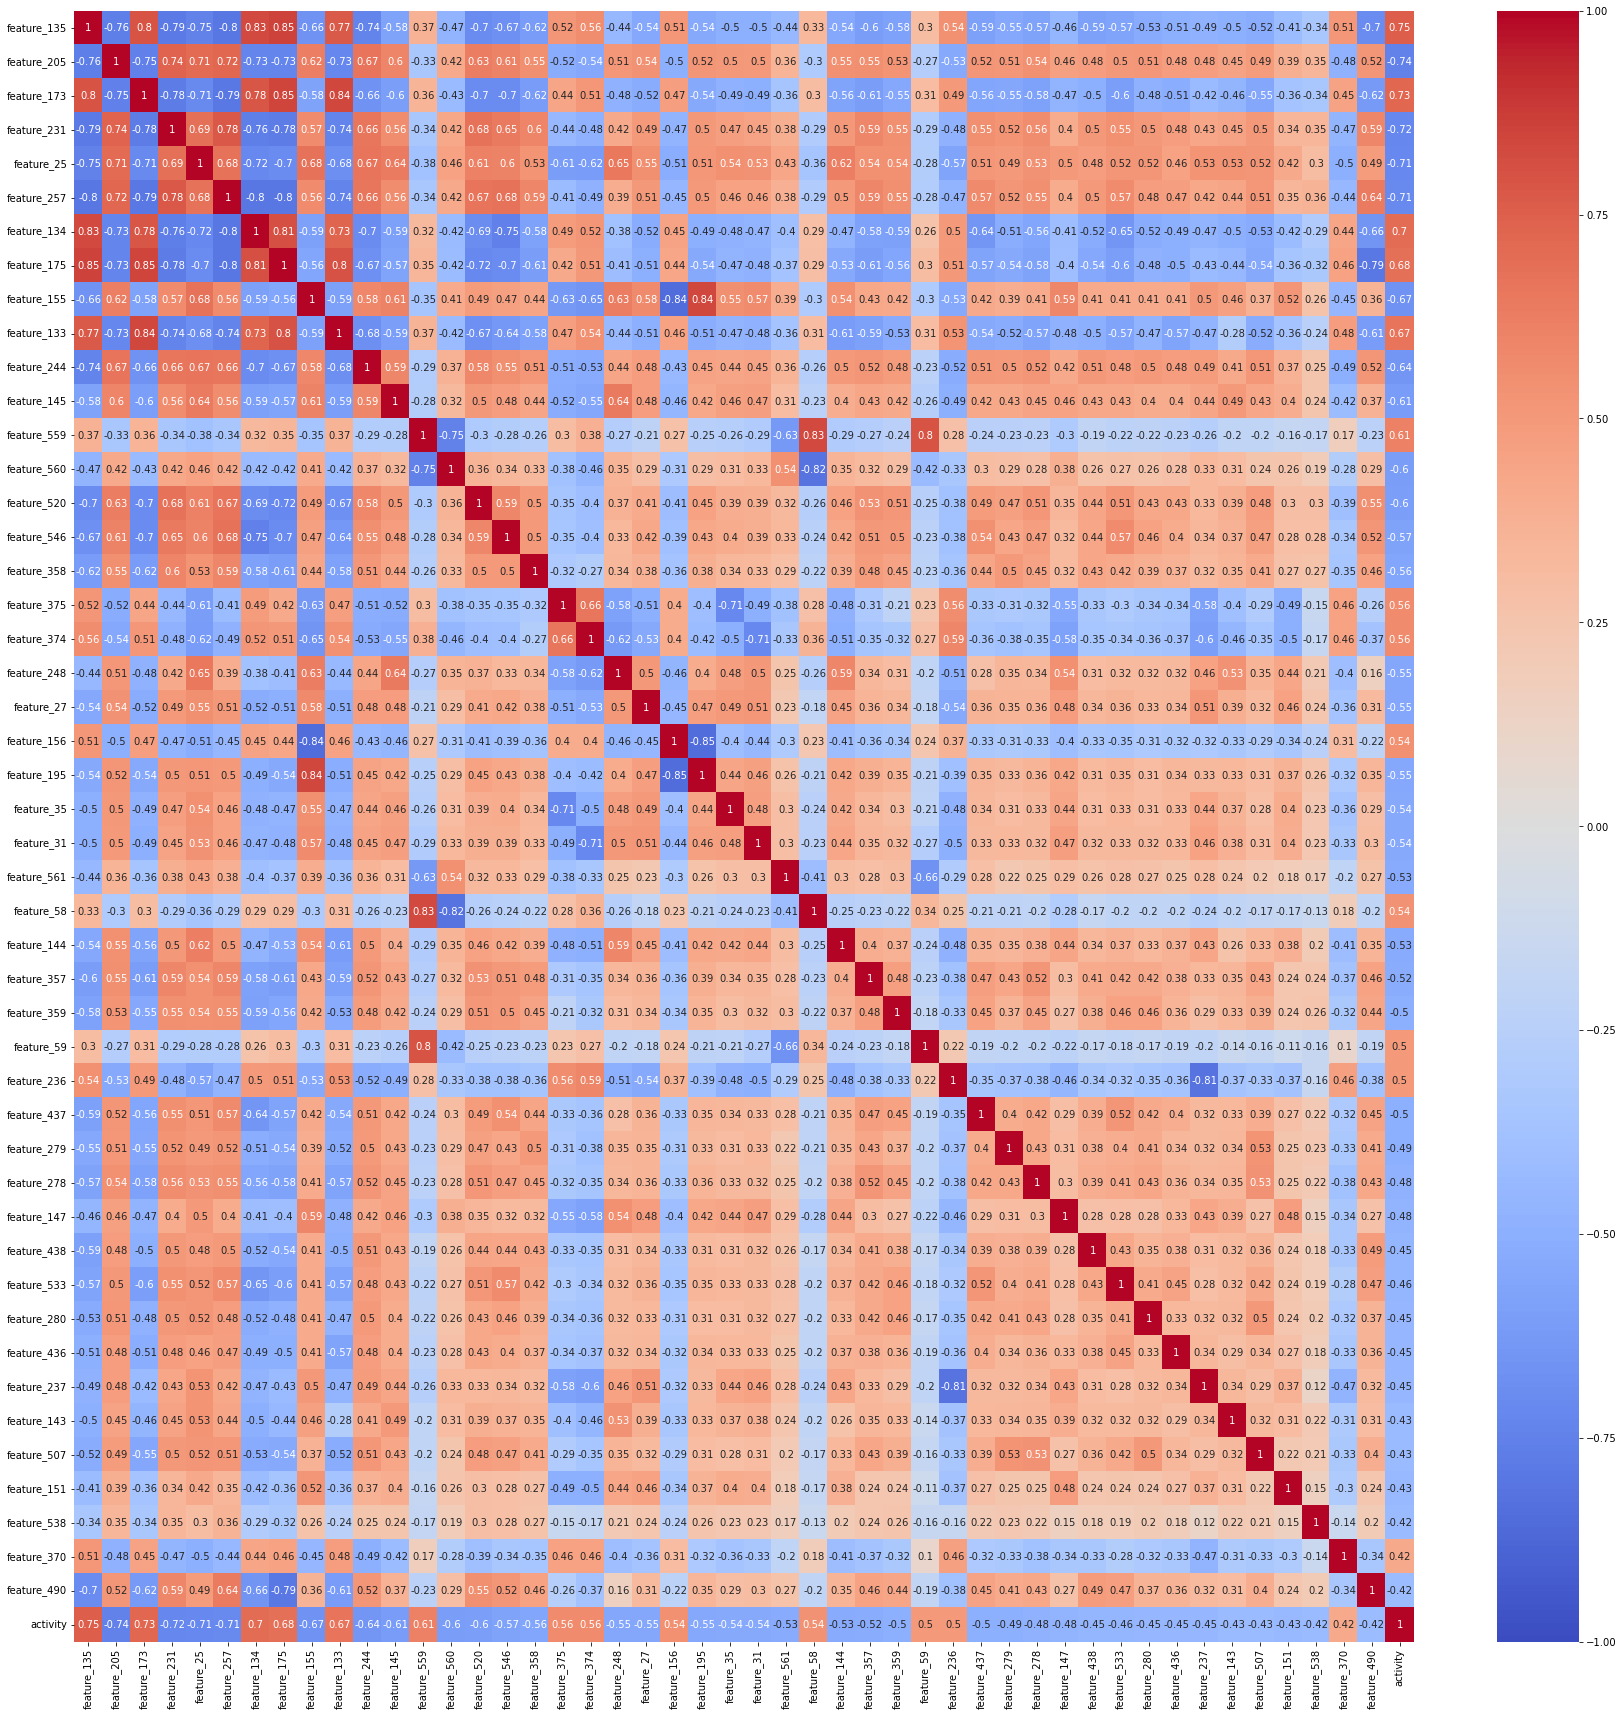

In [141]:
#corr map on shorter dataset
df = X_train.copy()
df["activity"] = y_train
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap='coolwarm', annot = True)

In [123]:
def split_data(df):
    
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, stratify=y, test_size=0.3, random_state=42
    )
    X_val, X_test, y_val, y_test = train_test_split(
        X_val, y_val, stratify=y_val, test_size=0.3, random_state=42
    )
    return X_train, X_val, X_test, y_train, y_val, y_test 

In [124]:
X_train, X_val, X_test, y_train, y_val, y_test = split_data(df)

In [125]:
print("X_train:",len(X_train))
print("y_train:",len(y_train))
print("X_val:",len(X_val))
print("y_val:",len(y_val))
print("X_test:",len(X_test))
print("y_test:",len(y_test))

X_train: 7209
y_train: 7209
X_val: 2163
y_val: 2163
X_test: 927
y_test: 927


In [126]:
X_train.shape

(7209, 47)

In [127]:
X_train.columns

Index(['feature_135', 'feature_205', 'feature_173', 'feature_231',
       'feature_25', 'feature_257', 'feature_134', 'feature_175',
       'feature_155', 'feature_133', 'feature_244', 'feature_145',
       'feature_559', 'feature_560', 'feature_520', 'feature_546',
       'feature_358', 'feature_375', 'feature_374', 'feature_248',
       'feature_27', 'feature_156', 'feature_195', 'feature_35', 'feature_31',
       'feature_561', 'feature_58', 'feature_144', 'feature_357',
       'feature_359', 'feature_59', 'feature_236', 'feature_437',
       'feature_279', 'feature_278', 'feature_147', 'feature_438',
       'feature_533', 'feature_280', 'feature_436', 'feature_237',
       'feature_143', 'feature_507', 'feature_151', 'feature_538',
       'feature_370', 'feature_490'],
      dtype='object')

In [20]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7209 entries, 4111 to 8906
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   feature_135  7209 non-null   float64
 1   feature_205  7209 non-null   float64
 2   feature_218  7209 non-null   float64
 3   feature_173  7209 non-null   float64
 4   feature_231  7209 non-null   float64
 5   feature_25   7209 non-null   float64
 6   feature_257  7209 non-null   float64
 7   feature_134  7209 non-null   float64
 8   feature_175  7209 non-null   float64
 9   feature_155  7209 non-null   float64
 10  feature_133  7209 non-null   float64
 11  feature_244  7209 non-null   float64
 12  feature_174  7209 non-null   float64
 13  feature_559  7209 non-null   float64
 14  feature_145  7209 non-null   float64
 15  feature_560  7209 non-null   float64
 16  feature_520  7209 non-null   float64
 17  feature_546  7209 non-null   float64
 18  feature_375  7209 non-null   float64
 19  fea

In [128]:
X_train.describe()

feature_135  feature_205  feature_173  feature_231   feature_25  \
count  7209.000000  7209.000000  7209.000000  7209.000000  7209.000000   
mean      0.559761    -0.837808     0.759880    -0.787868    -0.160163   
std       0.307539     0.189591     0.280288     0.254957     0.368262   
min      -1.000000    -1.000000    -1.000000    -1.000000    -1.000000   
25%       0.322000    -0.993000     0.567000    -0.983000    -0.500000   
50%       0.744000    -0.967000     0.931000    -0.963000    -0.137000   
75%       0.823000    -0.694000     0.991000    -0.610000     0.168000   
max       1.000000     0.720000     1.000000     1.000000     1.000000   

       feature_257  feature_134  feature_175  feature_155  feature_133  ...  \
count  7209.000000  7209.000000  7209.000000  7209.000000  7209.000000  ...   
mean     -0.803318     0.734733     0.799265     0.066553     0.631928  ...   
std       0.246835     0.211230     0.248100     0.282703     0.251907  ...   
min      -1.000000    -1.000000    -1.000000    -1.000000    -1.000000  ...   
25%      -0.990000     0.605000     0.644000    -0.168000     0.462000  ...   
50%      -0.971000     0.853000     0.956000     0.062700     0.772000  ...   
75%      -0.640000     0.906000     0.994000     0.288000     0.838000  ...   
max       0.804000     1.000000     1.000000     0.945000     1.000000  ...   

       feature_533  feature_280  feature_436  feature_237  feature_143  \
count  7209.000000  7209.000000  7209.000000  7209.000000  7209.000000   
mean     -0.889093    -0.913317    -0.932259    -0.028067    -0.144327   
std       0.163154     0.131322     0.111019     0.244897     0.456436   
min      -1.000000    -1.000000    -1.000000    -1.000000    -1.000000   
25%      -0.994000    -0.992000    -0.997000    -0.207000    -0.517000   
50%      -0.959000    -0.975000    -0.982000    -0.056100    -0.170000   
75%      -0.841000    -0.880000    -0.908000     0.137000     0.190000   
max       0.692000     1.000000     0.465000     0.939000     0.998000   

       feature_507  feature_151  feature_538  feature_370  feature_490  
count  7209.000000  7209.000000  7209.000000  7209.000000  7209.000000  
mean     -0.890974     0.169192    -0.888244    -0.411952    -0.933093  
std       0.161607     0.192132     0.157902     0.320531     0.128626  
min      -1.000000    -0.973000    -1.000000    -1.000000    -1.000000  
25%      -0.992000     0.035000    -1.000000    -0.680000    -1.000000  
50%      -0.970000     0.163000    -0.949000    -0.400000    -0.998000  
75%      -0.841000     0.298000    -0.846000    -0.160000    -0.914000  
max       1.000000     1.000000     0.949000     1.000000     1.000000  

[8 rows x 47 columns]

In [129]:
print(len(X_train))
print(len(y_train))

7209
7209


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000245B5EE0790>,
      dtype=object)

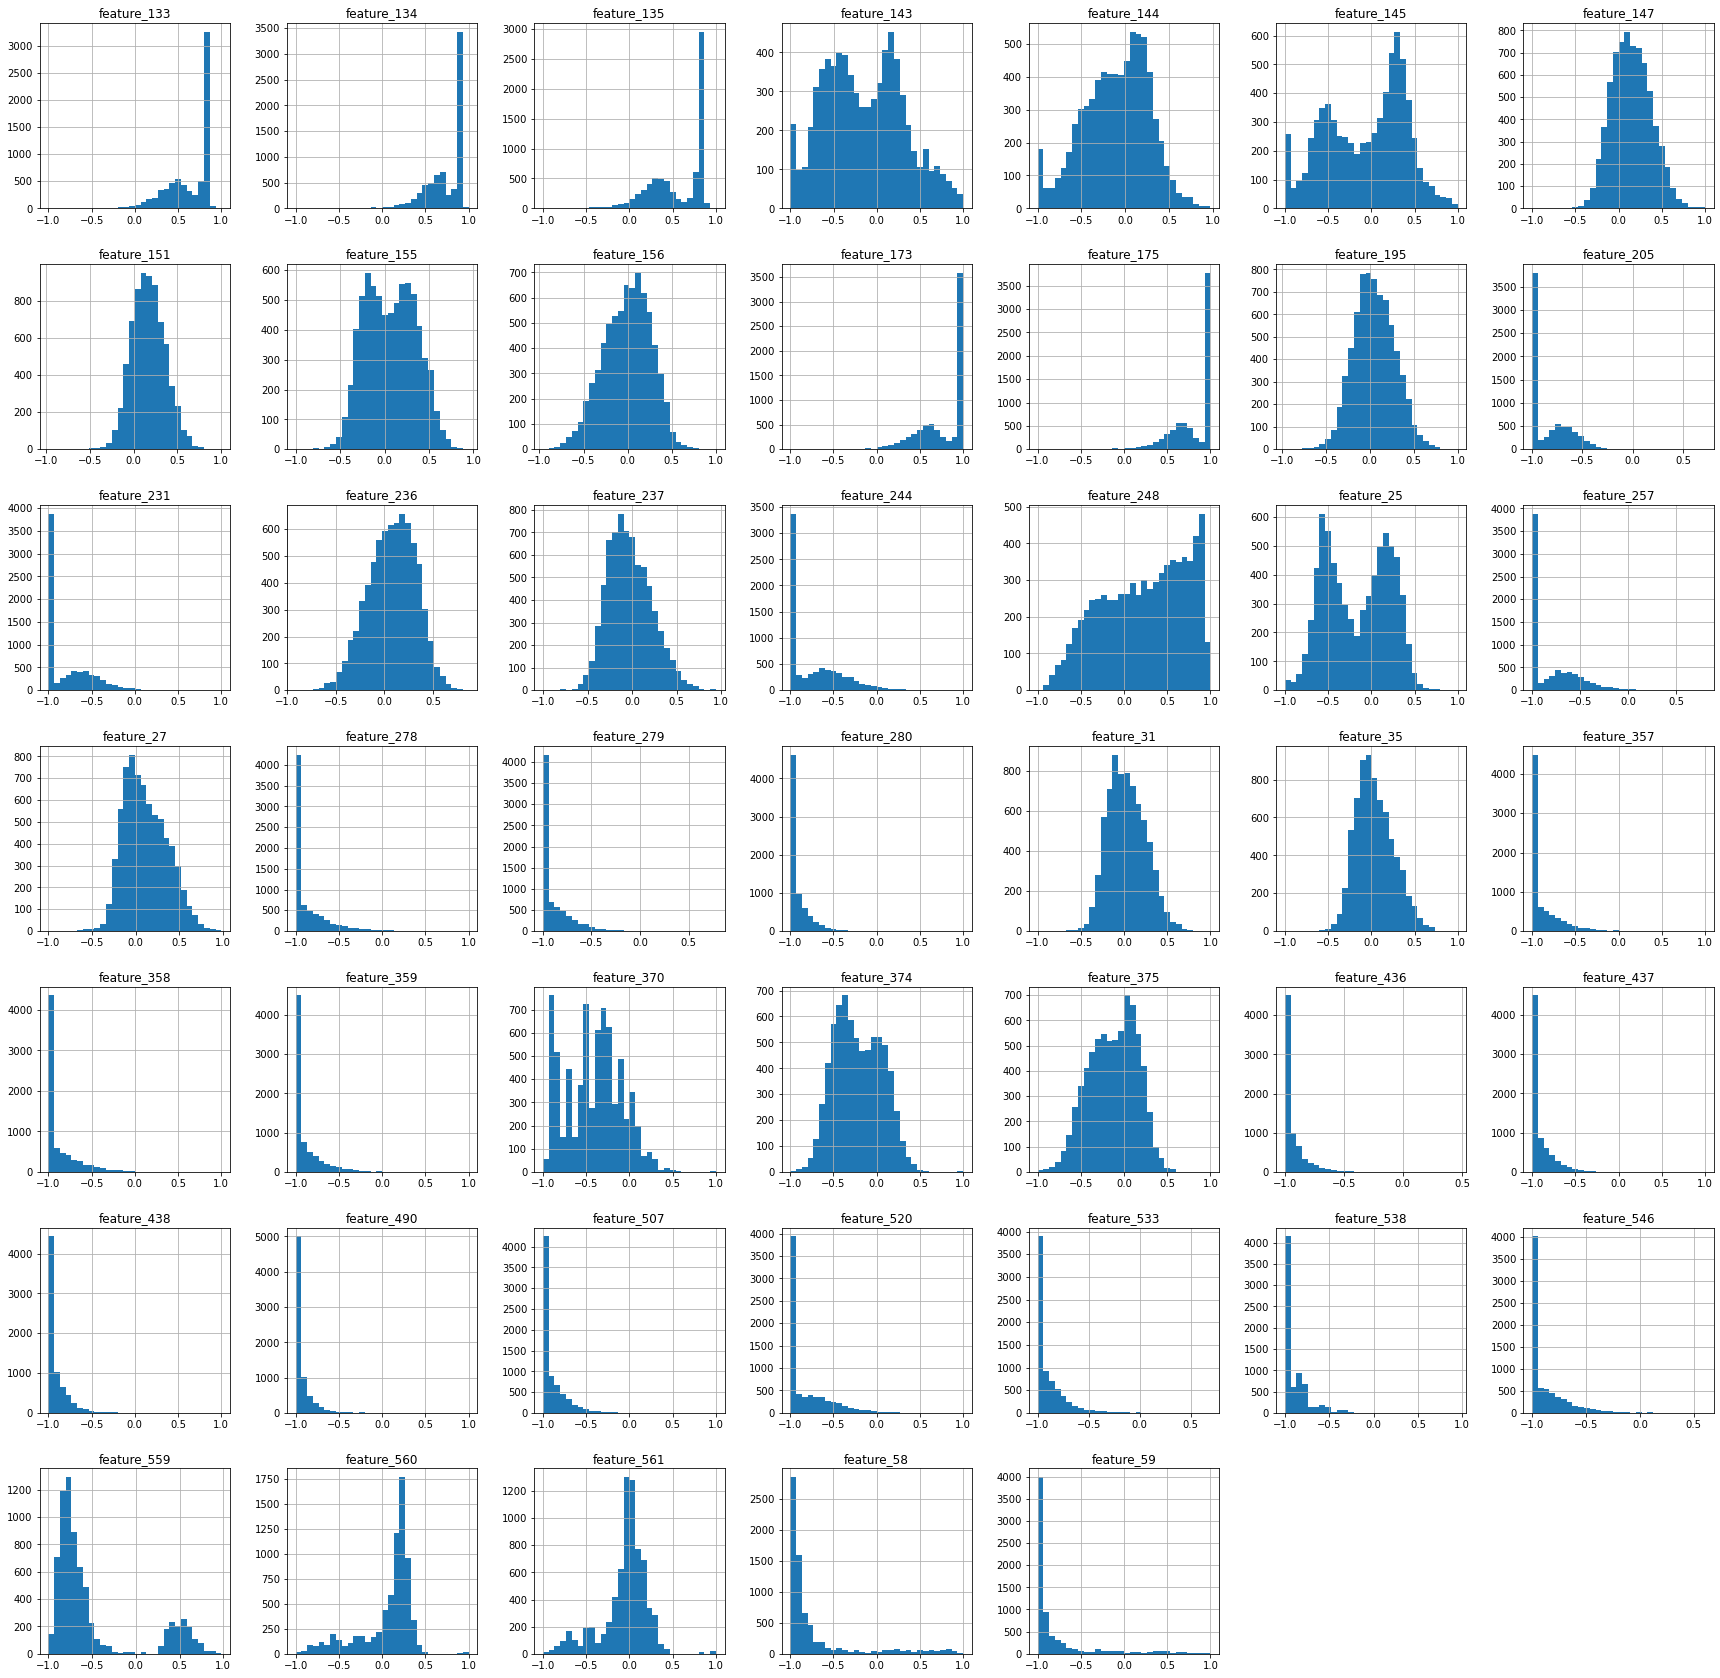

In [131]:
X_train.hist(bins=30, figsize=(30, 30))

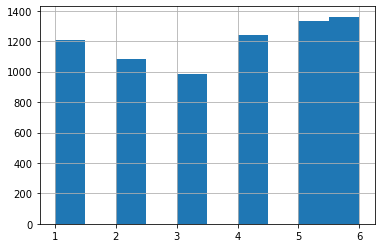

In [25]:
y_train.hist()

In [132]:
(df[df.columns] == 0).sum(axis = 0)

feature_135      0
feature_205      0
feature_218      0
feature_173      0
feature_231      0
feature_25       0
feature_257      0
feature_134      0
feature_175      0
feature_155      0
feature_133      0
feature_244      0
feature_174      0
feature_145      0
feature_559      0
feature_560      0
feature_520      0
feature_546      0
feature_358      0
feature_375      0
feature_374      0
feature_248      0
feature_27       0
feature_156      0
feature_195      0
feature_35       2
feature_31       0
feature_561      0
feature_58       0
feature_144      0
feature_357      0
feature_359      0
feature_59       0
feature_236      0
feature_437      0
feature_279      0
feature_278      0
feature_147      1
feature_438      0
feature_533      0
feature_280      0
feature_436      0
feature_237      0
feature_143      1
feature_507      0
feature_151      0
feature_538      0
feature_370    186
feature_490      0
activity         0
dtype: int64

In [133]:
df.nunique() / len(df) * 100

feature_135    16.326814
feature_205     9.377167
feature_218     9.377167
feature_173    12.720211
feature_231    12.581495
feature_25     26.355944
feature_257    11.998890
feature_134    10.805937
feature_175    11.499514
feature_155    28.617007
feature_133    12.942156
feature_244    15.785823
feature_174    11.138854
feature_145    27.451796
feature_559    15.882924
feature_560    22.846442
feature_520    14.079623
feature_546    10.375919
feature_358    11.457900
feature_375    31.793591
feature_374    29.435428
feature_248    30.226106
feature_27     32.764600
feature_156    32.334582
feature_195    33.055902
feature_35     32.931058
feature_31     31.904564
feature_561    37.453184
feature_58     15.924539
feature_144    29.865446
feature_357    10.237203
feature_359    10.001387
feature_59     15.799695
feature_236    31.252601
feature_437     8.836177
feature_279     9.890415
feature_278    11.582744
feature_147    31.682619
feature_438     8.142600
feature_533     9.210709


In [32]:
y_train

4111    1
8040    6
7234    6
833     2
2552    5
       ..
316     2
5920    4
1451    2
1307    2
8906    4
Name: activity, Length: 7209, dtype: int64

In [140]:
X_train

feature_135  feature_205  feature_173  feature_231  feature_25  \
4111       0.4090       -0.575        0.347       -0.441     0.39400   
8040       0.8080       -0.988        0.976       -0.993    -0.50500   
7234       0.8170       -0.990        0.995       -0.993    -0.45900   
833        0.0584       -0.466        0.199       -0.549     0.05700   
2552       0.8230       -0.995        0.988       -0.990    -0.54300   
...           ...          ...          ...          ...         ...   
316        0.4680       -0.839        0.634       -0.456     0.13500   
5920       0.8170       -0.993        0.993       -0.985    -0.33800   
1451       0.6590       -0.704        0.531       -0.685     0.19200   
1307       0.3960       -0.730        0.262       -0.378    -0.00451   
8906       0.8260       -0.992        0.995       -0.992    -0.51400   

      feature_257  feature_134  feature_175  feature_155  feature_133  ...  \
4111       -0.400        0.624        0.788       0.2660        0.490  ...   
8040       -0.990        0.892        0.987      -0.2980        0.817  ...   
7234       -0.996        0.916        0.998      -0.1860        0.844  ...   
833        -0.207        0.605        0.277       0.2040        0.567  ...   
2552       -0.989        0.914        0.997      -0.2140        0.835  ...   
...           ...          ...          ...          ...          ...  ...   
316        -0.396        0.416        0.643       0.1280        0.458  ...   
5920       -0.988        0.909        0.995      -0.1920        0.837  ...   
1451       -0.822        0.645        0.824       0.3420        0.265  ...   
1307       -0.296        0.614        0.267       0.2530       -0.147  ...   
8906       -0.991        0.913        0.997       0.0214        0.842  ...   

      feature_533  feature_280  feature_436  feature_237  feature_143  \
4111       -0.610       -0.911       -0.883       0.2620       0.0452   
8040       -0.994       -1.000       -0.993       0.1440      -0.1040   
7234       -0.999       -0.999       -0.998      -0.1310      -0.4110   
833        -0.635       -0.899       -0.984       0.3470       0.5680   
2552       -0.990       -0.991       -0.998      -0.1150      -0.3030   
...           ...          ...          ...          ...          ...   
316        -0.905       -0.733       -0.985       0.2320      -0.2520   
5920       -0.999       -0.984       -0.997       0.0753      -0.3910   
1451       -0.912       -0.977       -0.808       0.2670      -0.3510   
1307       -0.784       -0.871       -0.887       0.2100      -0.6200   
8906       -0.991       -0.993       -0.998      -0.3410      -0.8020   

      feature_507  feature_151  feature_538  feature_370  feature_490  
4111       -0.916       0.4630       -0.795        -0.36       -0.917  
8040       -0.993       0.0017       -0.949        -0.80       -1.000  
7234       -0.992       0.0519       -1.000        -0.60       -1.000  
833        -0.765       0.1210       -0.538        -0.88       -0.611  
2552       -0.988      -0.1110       -1.000        -0.24       -1.000  
...           ...          ...          ...          ...          ...  
316        -0.836       0.2660       -0.846        -0.88       -0.889  
5920       -0.996       0.2430       -1.000         0.28       -1.000  
1451       -0.967       0.5990       -0.949        -0.72       -0.962  
1307       -0.757       0.4970       -0.949        -0.52       -0.668  
8906       -1.000      -0.1200       -1.000        -0.48       -1.000  

[7209 rows x 47 columns]

In [134]:
from sklearn.linear_model import LogisticRegression
reg_log = LogisticRegression(multi_class="multinomial", max_iter=5000)

In [146]:
reg_log.fit(X_train,y_train)
y_pred = reg_log.predict(X_val)

In [149]:
from sklearn.metrics import accuracy_score, recall_score
print("accuracy: ", accuracy_score(y_val,y_pred))


accuracy:  0.8950531668978271
